<a href="https://colab.research.google.com/github/pruthviraz/Breast-Prediction/blob/main/NLP_Assign_4%2C5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Task 4: Word Embeddings and Language Understanding

In [ ]:
!pip install gensim nltk

In [ ]:
# Prepare a Sample Text Corpus
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

corpus = [
    "The cat sat on the mat.",
    "Dogs are loyal animals.",
    "Cats and dogs are popular pets.",
    "She loves her dog and plays with it daily.",
    "He bought a new puppy from the pet store.",
    "The dog barked loudly at the stranger."
]

# Tokenize and clean
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Train Word2Vec Embeddings

from gensim.models import Word2Vec

# Create Word2Vec model (CBOW)
model_cbow = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=0)

# Skip-gram version
model_skipgram = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1)


In [ ]:
# Find Semantically Similar Words

# Example: find similar words to "dog"
print("CBOW:", model_cbow.wv.most_similar("dog"))
print("Skip-gram:", model_skipgram.wv.most_similar("dog"))

CBOW: [('barked', 0.2528727352619171), ('loyal', 0.20082910358905792), ('mat', 0.17530226707458496), ('dogs', 0.1701977252960205), ('daily', 0.15016482770442963), ('and', 0.1388643980026245), ('new', 0.10842931270599365), ('it', 0.09936432540416718), ('cat', 0.05292973667383194), ('at', 0.034764934331178665)]
Skip-gram: [('barked', 0.25284236669540405), ('loyal', 0.20082910358905792), ('mat', 0.17530226707458496), ('dogs', 0.17024235427379608), ('daily', 0.15016482770442963), ('and', 0.13886670768260956), ('new', 0.10815751552581787), ('it', 0.09936432540416718), ('cat', 0.05292973667383194), ('at', 0.034764934331178665)]


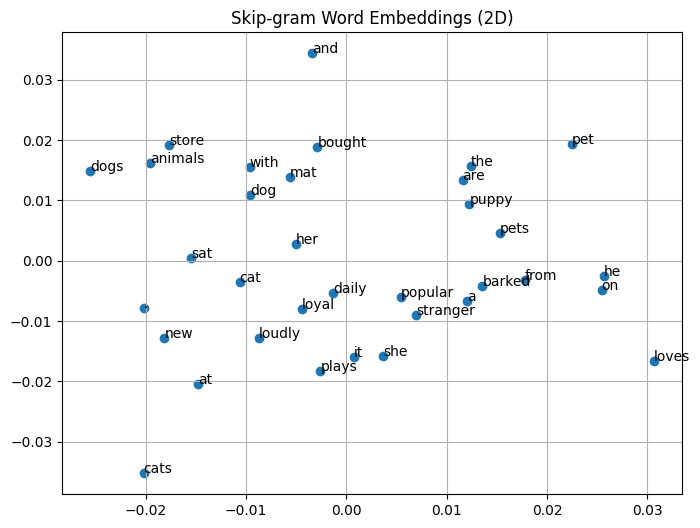

In [ ]:
# Visualize Word Embeddings

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_word_embeddings(model, title="Word2Vec Embeddings"):
    words = list(model.wv.index_to_key)
    vectors = model.wv[words]

    # Reduce dimensions
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(8,6))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_word_embeddings(model_skipgram, "Skip-gram Word Embeddings (2D)")

In [ ]:
# Task 5

In [ ]:
# Mini NLP Project – Text Classification & Report

In [ ]:
# Install Required Packages


!pip install pandas scikit-learn matplotlib seaborn nltk
!pip install transformers datasets
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Load and Prepare the Spam Dataset

import pandas as pd

# Load CSV (update path if using your own file in Colab)
df = pd.read_csv("/content/spam.csv.xls", encoding="latin1")[["v1", "v2"]]
df.columns = ["label", "text"]

# Encode labels
df["label"] = df["label"].map({"ham": 0, "spam": 1})

df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Preprocess & Split the Data

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



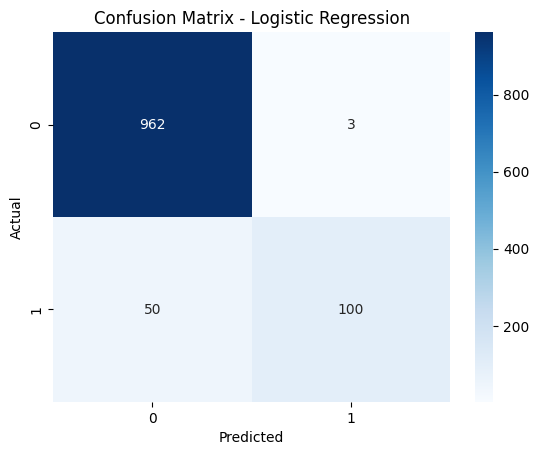

In [ ]:
# Train a Baseline Classifier (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Predict
y_pred = lr.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Transformer Model (BERT Fine-Tuning)

from transformers import pipeline

# Load BERT fine-tuned on sentiment (or use custom if time permits)
classifier = pipeline("text-classification", model="mrm8488/bert-tiny-finetuned-sms-spam-detection")

# Sample predictions
bert_preds = [classifier(text)[0]["label"] for text in X_test[:10]]
list(zip(X_test[:10], bert_preds))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/324 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


[('Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens',
  'LABEL_0'),
 ('I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones',
  'LABEL_0'),
 ('We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p',
  'LABEL_1'),
 ("Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.",
  'LABEL_0'),
 ('Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16',
  'LABEL_1'),
 ("I'll text carlos and let you know, hang on", 'LABEL_0'),
 ("K.i did't see you.:)k:)where are you now?", 'LABEL_0'),
 ('No message..no responce..what h

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Logistic Regression Accuracy: 95.25 %
BERT Accuracy (subset): 88.0 %


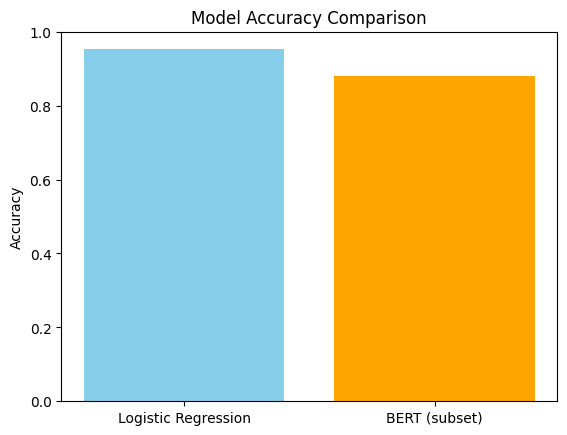

In [ ]:
# Accuracy Comparison

# Logistic Regression accuracy
lr_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(lr_acc * 100, 2), "%")

# Assume BERT predictions for demo (binary mapping)
bert_simple_preds = [1 if classifier(text)[0]["label"] == "spam" else 0 for text in X_test[:100]]
bert_acc = accuracy_score(y_test[:100], bert_simple_preds)
print("BERT Accuracy (subset):", round(bert_acc * 100, 2), "%")

# Bar chart comparison
plt.bar(["Logistic Regression", "BERT (subset)"], [lr_acc, bert_acc], color=["skyblue", "orange"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()